
<h1 style="text-align: center;">Final Task ID/X Partners Data Scientist Project Based Internship</h1>


"This project aims to assist multifinance companies in improving the accuracy of credit assessment and risk management through the development of a machine learning model. This model will predict credit risk based on a dataset that includes data on approved and rejected loans. The goal is to optimize business decisions, reduce potential losses, and increase efficiency in the loan issuance process."

by Wulan Kurnia Ananda

### Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

df = pd.read_csv(r'C:\Users\ACER\Documents\Project\loan_dataset.csv', low_memory=False)
pd.set_option('display.max_columns', None)
df.head()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Data Understanding

In [2]:
# Check dimensions of the dataframe
print("The dimensions of the dataframe are: ", df.shape)

The dimensions of the dataframe are:  (466285, 75)


In [3]:
# Check info of the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 75 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [4]:
# Check descriptive statistics of the dataframe
df.describe()

,Unnamed: 0,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,466285.000000,4.662850e+05,4.662850e+05,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,4.662810e+05,466285.000000,466256.000000,466256.000000,215934.000000,62638.000000,466256.000000,466256.000000,4.662850e+05,465945.000000,466256.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466285.000000,466140.000000,98974.000000,466285.0,0.0,0.0,0.0,466256.000000,3.960090e+05,3.960090e+05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.960090e+05,0.0,0.0,0.0
mean,233142.000000,1.307973e+07,1.459766e+07,14317.277577,14291.801044,14222.329888,13.829236,432.061201,7.327738e+04,17.218758,0.284678,0.804745,34.104430,74.306012,11.187069,0.160564,1.623020e+04,56.176947,25.064430,4410.062342,4408.452258,11540.686220,11469.892747,8866.014657,2588.677225,0.650129,85.344211,8.961534,3123.913796,0.009085,42.852547,1.0,NaN,NaN,NaN,0.004002,1.919135e+02,1.388017e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.037909e+04,NaN,NaN,NaN
std,134605.029472,1.089371e+07,1.168237e+07,8286.509164,8274.371300,8297.637788,4.357587,243.485550,5.496357e+04,7.851121,0.797365,1.091598,21.778487,30.357653,4.987526,0.510863,2.067625e+04,23.732628,11.600141,6355.078769,6353.198001,8265.627112,8254.157579,7031.687997,2483.809661,5.265730,552.216084,85.491437,5554.737393,0.108648,21.662591,0.0,NaN,NaN,NaN,0.068637,1.463021e+04,1.521147e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.724713e+04,NaN,NaN,NaN
min,0.000000,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.420000,15.670000,1.896000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN
25%,116571.000000,3.639987e+06,4.379705e+06,8000.000000,8000.000000,8000.000000,10.990000,256.690000,4.500000e+04,11.360000,0.000000,0.000000,16.000000,53.000000,8.000000,0.000000,6.413000e+03,39.200000,17.000000,0.000000,0.000000,5552.125349,5499.250000,3708.560000,957.280000,0.000000,0.000000,0.000000,312.620000,0.000000,26.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.861800e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.350000e+04,NaN,NaN,NaN
50%,233142.000000,1.010790e+07,1.194108e+07,12000.000000,12000.000000,12000.000000,13.660000,379.890000,6.300000e+04,16.870000,0.000000,0.000000,31.000000,76.000000,10.000000,0.000000,1.176400e+04,57.600000,23.000000,441.470000,441.380000,9419.250943,9355.430000,6817.760000,1818.880000,0.000000,0.000000,0.000000,545.960000,0.000000,42.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,8.153900e+04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.280000e+04,NaN,NaN,NaN
75%,349713.000000,2.073121e+07,2.300154e+07,20000.000000,20000.000000,19950.000000,16.490000,566.580000,8.896000e+04,22.780000,0.000000,1.000000,49.000000,102.000000,14.000000,0.000000,2.033300e+04,74.700000,32.000000,7341.650000,7338.390000,15308.158460,15231.310000,12000.000000,3304.530000,0.000000,0.000000,0.000000,3187.510000,0.000000,59.000000,1.0,NaN,NaN,NaN,0.000000,0.000000e+00,2.089530e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [5]:
# Check descriptive statistics of the categorical columns
df.describe(include='object')

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,earliest_cr_line,initial_list_status,last_pymnt_d,next_pymnt_d,last_credit_pull_d,application_type
count,466285,466285,466285,438697,445277,466285,466285,466285,466285,466285,466285,125981,466285,466264,466285,466285,466256,466285,465909,239071,466243,466285
unique,2,7,35,205475,11,6,3,91,9,2,466285,124435,14,63098,888,50,664,2,98,100,103,1
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Verified,Oct-14,Current,n,https://www.lendingclub.com/browse/loanDetail....,,debt_consolidation,Debt consolidation,945xx,CA,Oct-00,f,Jan-16,Feb-16,Jan-16,INDIVIDUAL
freq,337953,136929,31686,5399,150049,235875,168055,38782,224226,466276,1,234,274195,164075,5304,71450,3674,303005,179620,208393,327699,466285


In [6]:
# Check columns with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]

# Sort the result in ascending order
missing_values = missing_values.sort_values(ascending=True)
missing_values


annual_inc                          4
title                              21
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
total_acc                          29
open_acc                           29
pub_rec                            29
acc_now_delinq                     29
last_credit_pull_d                 42
collections_12_mths_ex_med        145
revol_util                        340
last_pymnt_d                      376
emp_length                      21008
emp_title                       27588
tot_coll_amt                    70276
tot_cur_bal                     70276
total_rev_hi_lim                70276
next_pymnt_d                   227214
mths_since_last_delinq         250351
desc                           340304
mths_since_last_major_derog    367311
mths_since_last_record         403647
verification_status_joint      466285
dti_joint                      466285
open_acc_6m                    466285
open_il_6m  

In [7]:
# Check duplicate rows
duplicate_rows = df.duplicated().sum()
print("The number of duplicate rows are: ", duplicate_rows)

The number of duplicate rows are:  0


In [8]:
# Checking unique value (exclude column with no value)
unique_values = df.nunique().sort_values(ascending=True)
unique_values = unique_values[unique_values > 0]
unique_values

policy_code                         1
application_type                    1
term                                2
initial_list_status                 2
pymnt_plan                          2
verification_status                 3
acc_now_delinq                      6
home_ownership                      6
grade                               7
collections_12_mths_ex_med          9
loan_status                         9
emp_length                         11
purpose                            14
delinq_2yrs                        24
pub_rec                            26
inq_last_6mths                     28
sub_grade                          35
addr_state                         50
open_acc                           62
issue_d                            91
last_pymnt_d                       98
next_pymnt_d                      100
last_credit_pull_d                103
total_acc                         112
mths_since_last_record            123
mths_since_last_delinq            145
mths_since_l

In [9]:
# Removes columns that do not have values
df = df.dropna(axis=1, how='all')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 58 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Unnamed: 0                   466285 non-null  int64  
 1   id                           466285 non-null  int64  
 2   member_id                    466285 non-null  int64  
 3   loan_amnt                    466285 non-null  int64  
 4   funded_amnt                  466285 non-null  int64  
 5   funded_amnt_inv              466285 non-null  float64
 6   term                         466285 non-null  object 
 7   int_rate                     466285 non-null  float64
 8   installment                  466285 non-null  float64
 9   grade                        466285 non-null  object 
 10  sub_grade                    466285 non-null  object 
 11  emp_title                    438697 non-null  object 
 12  emp_length                   445277 non-null  object 
 13 

In [10]:
# Drop columns with 1 unique value, redudant, big missing value, and unrelevant
dropped = ['Unnamed: 0','id', 'member_id', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'emp_title','url', 'desc', 'title', 'zip_code',
           'mths_since_last_delinq', 'mths_since_last_record', 'out_prncp_inv', 'total_pymnt' ,'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries',
            'collection_recovery_fee', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'total_rev_hi_lim']

df.drop(columns = dropped, axis=1, inplace=True)

# Check info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 466285 entries, 0 to 466284
Data columns (total 30 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   466285 non-null  int64  
 1   term                        466285 non-null  object 
 2   int_rate                    466285 non-null  float64
 3   installment                 466285 non-null  float64
 4   grade                       466285 non-null  object 
 5   emp_length                  445277 non-null  object 
 6   home_ownership              466285 non-null  object 
 7   annual_inc                  466281 non-null  float64
 8   verification_status         466285 non-null  object 
 9   issue_d                     466285 non-null  object 
 10  loan_status                 466285 non-null  object 
 11  pymnt_plan                  466285 non-null  object 
 12  purpose                     466285 non-null  object 
 13  addr_state    

In [11]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

emp_length                    21008
annual_inc                        4
delinq_2yrs                      29
earliest_cr_line                 29
inq_last_6mths                   29
open_acc                         29
pub_rec                          29
revol_util                      340
total_acc                        29
collections_12_mths_ex_med      145
acc_now_delinq                   29
tot_coll_amt                  70276
tot_cur_bal                   70276
dtype: int64

In [12]:
# Checking for unique values column 'loan_status'
print(df['loan_status'].value_counts())

loan_status
Current                                                224226
Fully Paid                                             184739
Charged Off                                             42475
Late (31-120 days)                                       6900
In Grace Period                                          3146
Does not meet the credit policy. Status:Fully Paid       1988
Late (16-30 days)                                        1218
Default                                                   832
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64


In [13]:
# Labeling the target variable
# Classify loan_status into binary categories (Good/Bad)
def classify_loan_status(status):
    if status in ['Charged Off', 'Default', 'Late (31-120 days)', 'Late (16-30 days)']:
        return 'Bad'
    elif status in ['Fully Paid', 'Current', 'In Grace Period']:
        return 'Good'
    else:
        return None  # For irrelevant status
    
# Create a new column
df['loan_risk'] = df['loan_status'].apply(classify_loan_status)

# Drop rows with None (optional, if you want to focus on binary categories)
df = df[df['loan_risk'].notnull()]

# Check the distribution of the target
print(df['loan_risk'].value_counts())


loan_risk
Good    412111
Bad      51425
Name: count, dtype: int64


In [14]:
# Mapping 'emp_length' column
emp_length_mapping = {
    '< 1 year': 0.5,
    '1 year': 1,
    '2 years': 2,
    '3 years': 3,
    '4 years': 4,
    '5 years': 5,
    '6 years': 6,
    '7 years': 7,
    '8 years': 8,
    '9 years': 9,
    '10+ years': 10
}
df['emp_length'] = df['emp_length'].map(emp_length_mapping).astype(float)

In [15]:
# Change value'home_ownership'column
df['home_ownership'] = df['home_ownership'].replace(['NONE', 'ANY'], 'OTHER')

# Check data type
df['home_ownership'].value_counts()


home_ownership
MORTGAGE    234619
RENT        187210
OWN          41517
OTHER          190
Name: count, dtype: int64

In [16]:
# Convert 'term' to integer
df['term'] = df['term'].str.replace(' months', '').astype(int)

# Convert 'issue_d' to datetime with the specified format
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%y')

# Convert 'earliest_cr_line' to datetime first, then correct incorrect years
df['earliest_cr_line'] = pd.to_datetime(df['earliest_cr_line'], format='%b-%y')

# Define function to replace incorrect years
def correct_year(date):
    if date.year > 2011:  # If year > 2011, it's considered incorrect
        # Reduce years greater than 2011 by 100 (e.g., 2044 becomes 1944)
        return date.replace(year=date.year - 100)
    return date

# Apply the function to fix incorrect years in 'earliest_cr_line'
df['earliest_cr_line'] = df['earliest_cr_line'].apply(correct_year)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463536 entries, 0 to 466284
Data columns (total 31 columns):
 #   Column                      Non-Null Count   Dtype         
---  ------                      --------------   -----         
 0   loan_amnt                   463536 non-null  int64         
 1   term                        463536 non-null  int64         
 2   int_rate                    463536 non-null  float64       
 3   installment                 463536 non-null  float64       
 4   grade                       463536 non-null  object        
 5   emp_length                  442562 non-null  float64       
 6   home_ownership              463536 non-null  object        
 7   annual_inc                  463536 non-null  float64       
 8   verification_status         463536 non-null  object        
 9   issue_d                     463536 non-null  datetime64[ns]
 10  loan_status                 463536 non-null  object        
 11  pymnt_plan                  463536 non-null 

In [18]:
#  Check column with missing values
missing_values = df.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

emp_length                    20974
revol_util                      300
collections_12_mths_ex_med       56
tot_coll_amt                  67527
tot_cur_bal                   67527
dtype: int64

In [19]:
# Impute missing values in 'emp_length' with the mode
df['emp_length'] = df['emp_length'].fillna(df['emp_length'].mode()[0])

# Impute 'revol_util' with the median
df['revol_util'] = df['revol_util'].fillna(df['revol_util'].median())

# Impute missing values in 'collections_12_mths_ex_med' with 0
df['collections_12_mths_ex_med'] = df['collections_12_mths_ex_med'].fillna(0)

# Drop tot_coll_amt, tot_cur_bal, and loan_status
df = df.drop(columns=['tot_coll_amt', 'tot_cur_bal', 'loan_status'])

# Check remaining missing values
print(df.isnull().sum())

loan_amnt                     0
term                          0
int_rate                      0
installment                   0
grade                         0
emp_length                    0
home_ownership                0
annual_inc                    0
verification_status           0
issue_d                       0
pymnt_plan                    0
purpose                       0
addr_state                    0
dti                           0
delinq_2yrs                   0
earliest_cr_line              0
inq_last_6mths                0
open_acc                      0
pub_rec                       0
revol_bal                     0
revol_util                    0
total_acc                     0
initial_list_status           0
out_prncp                     0
last_pymnt_amnt               0
collections_12_mths_ex_med    0
acc_now_delinq                0
loan_risk                     0
dtype: int64


### Exploratory Data Analysis (EDA)

In [20]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
datetime_cols = df.select_dtypes(include=['datetime64[ns]']).columns.tolist()

print("Numerical Columns:", numerical_cols)
print("Categorical Columns:", categorical_cols)
print("Datetime Columns:", datetime_cols)

Numerical Columns: ['loan_amnt', 'term', 'int_rate', 'installment', 'emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'out_prncp', 'last_pymnt_amnt', 'collections_12_mths_ex_med', 'acc_now_delinq']
Categorical Columns: ['grade', 'home_ownership', 'verification_status', 'pymnt_plan', 'purpose', 'addr_state', 'initial_list_status', 'loan_risk']
Datetime Columns: ['issue_d', 'earliest_cr_line']



Descriptive Statistics for Numerical Columns:
           loan_amnt           term       int_rate    installment  \
count  463536.000000  463536.000000  463536.000000  463536.000000   
mean    14348.575569      42.628404      13.827334     432.891377   
std      8287.139007      10.730620       4.365371     243.447747   
min       500.000000      36.000000       5.420000      15.690000   
25%      8000.000000      36.000000      10.990000     257.430000   
50%     12000.000000      36.000000      13.660000     381.040000   
75%     20000.000000      60.000000      16.490000     567.342500   
max     35000.000000      60.000000      26.060000    1409.990000   

          emp_length    annual_inc            dti    delinq_2yrs  \
count  463536.000000  4.635360e+05  463536.000000  463536.000000   
mean        6.223781  7.328839e+04      17.236823       0.284947   
std         3.573995  5.487171e+04       7.850529       0.797648   
min         0.500000  3.000000e+03       0.000000       0.0

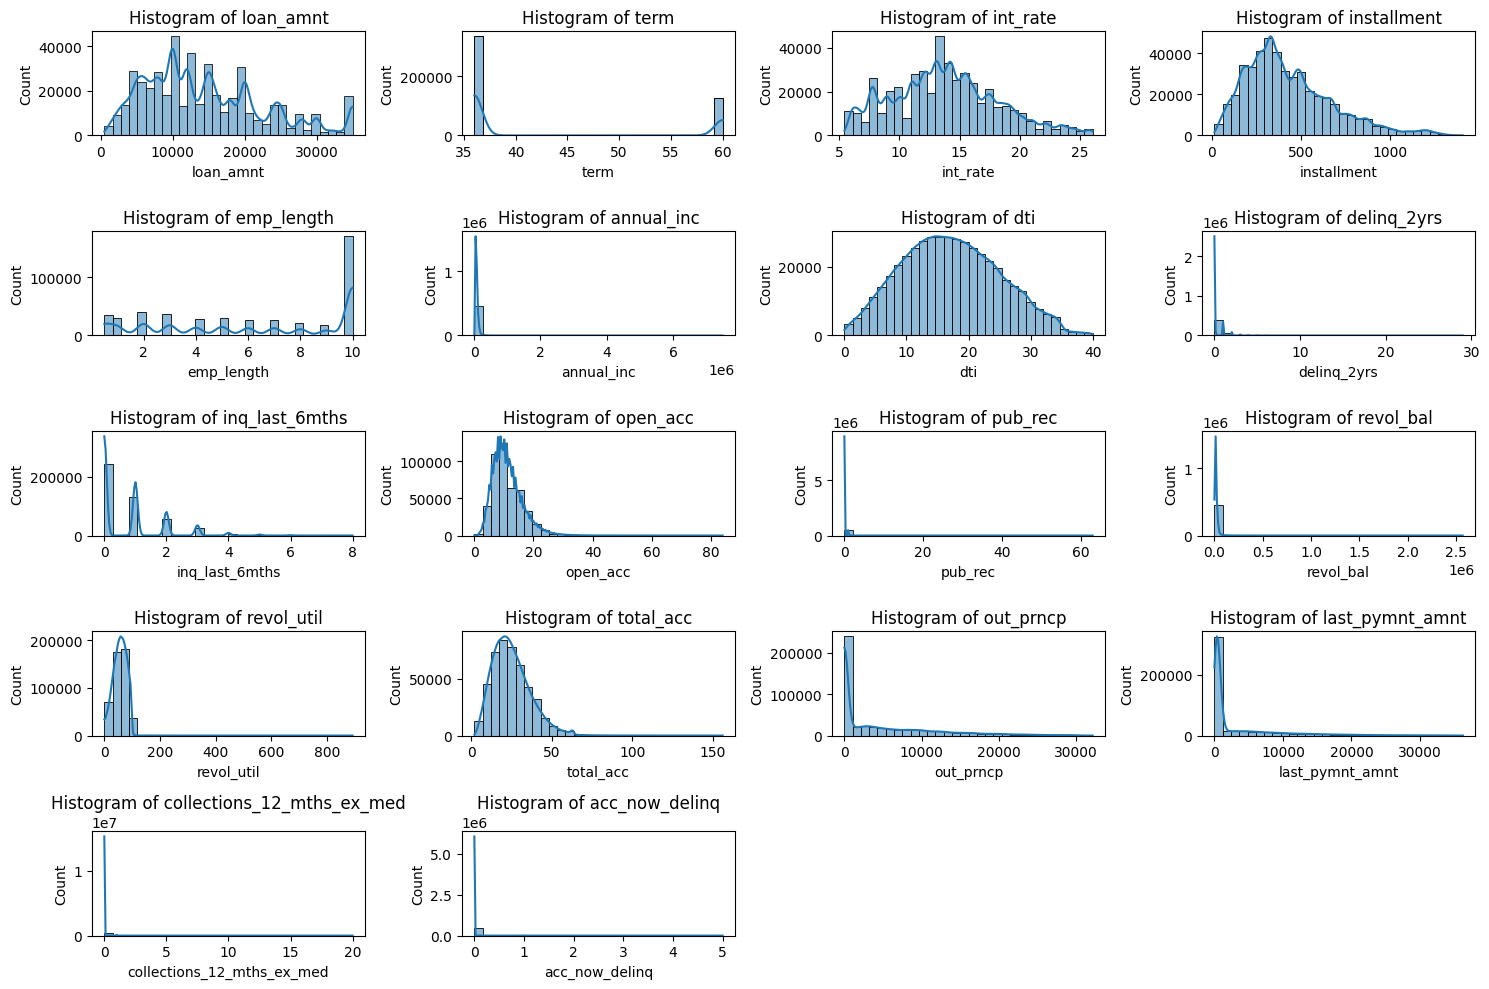

In [21]:
# Univariate Analysis
# Numerical
print("\nDescriptive Statistics for Numerical Columns:")
print(df[numerical_cols].describe())

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f"Histogram of {col}")
    plt.tight_layout()
plt.show()



Value Counts for grade:
grade
B    136575
C    124664
D     76197
A     74769
E     35221
F     12982
G      3128
Name: count, dtype: int64

Value Counts for home_ownership:
home_ownership
MORTGAGE    234619
RENT        187210
OWN          41517
OTHER          190
Name: count, dtype: int64

Value Counts for verification_status:
verification_status
Verified           167428
Source Verified    149703
Not Verified       146405
Name: count, dtype: int64

Value Counts for pymnt_plan:
pymnt_plan
n    463527
y         9
Name: count, dtype: int64

Value Counts for purpose:
purpose
debt_consolidation    273095
credit_card           103817
home_improvement       26323
other                  23266
major_purchase          9705
small_business          6852
car                     5333
medical                 4544
moving                  2948
vacation                2468
wedding                 2287
house                   2225
renewable_energy         348
educational              325
Name: count, 

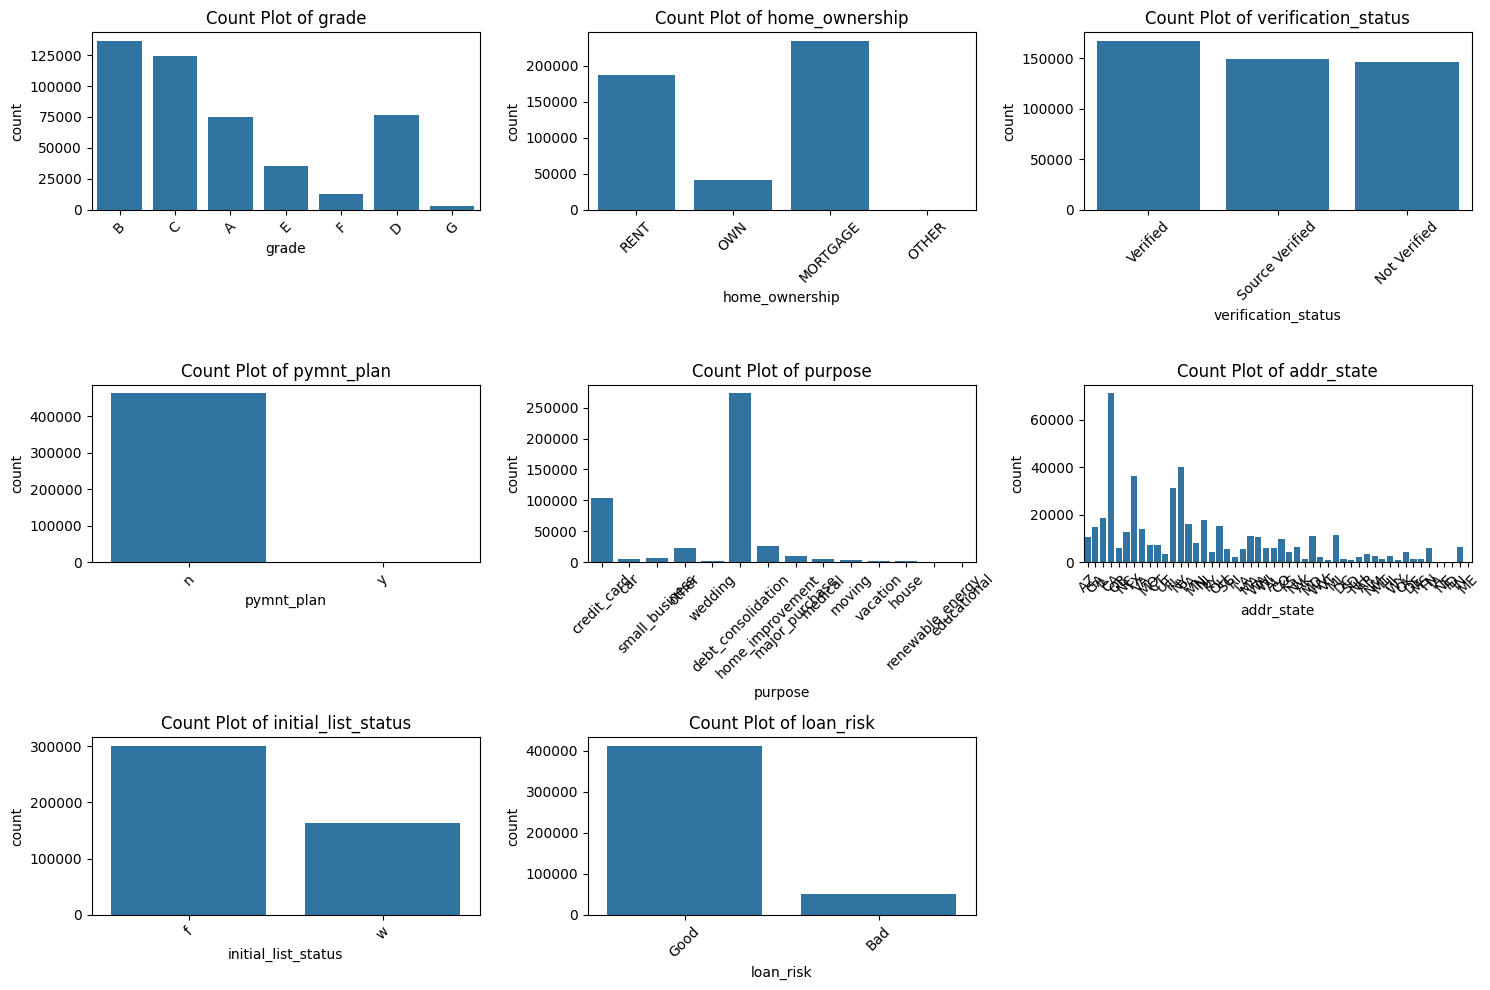

In [22]:
# Categorical
for col in categorical_cols:
    print(f"\nValue Counts for {col}:")
    print(df[col].value_counts())

plt.figure(figsize=(15, 10))
for i, col in enumerate(categorical_cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(x=col, data=df)
    plt.title(f"Count Plot of {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
plt.show()

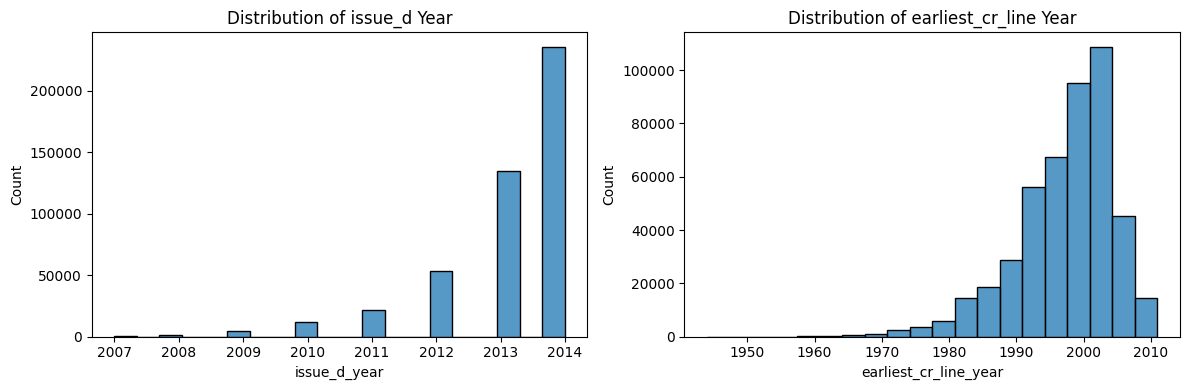

In [23]:
# Datetime
df['issue_d_year'] = df['issue_d'].dt.year
df['earliest_cr_line_year'] = df['earliest_cr_line'].dt.year
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df['issue_d_year'], bins=20)
plt.title("Distribution of issue_d Year")
plt.subplot(1, 2, 2)
sns.histplot(df['earliest_cr_line_year'], bins=20)
plt.title("Distribution of earliest_cr_line Year")
plt.tight_layout()
plt.show()

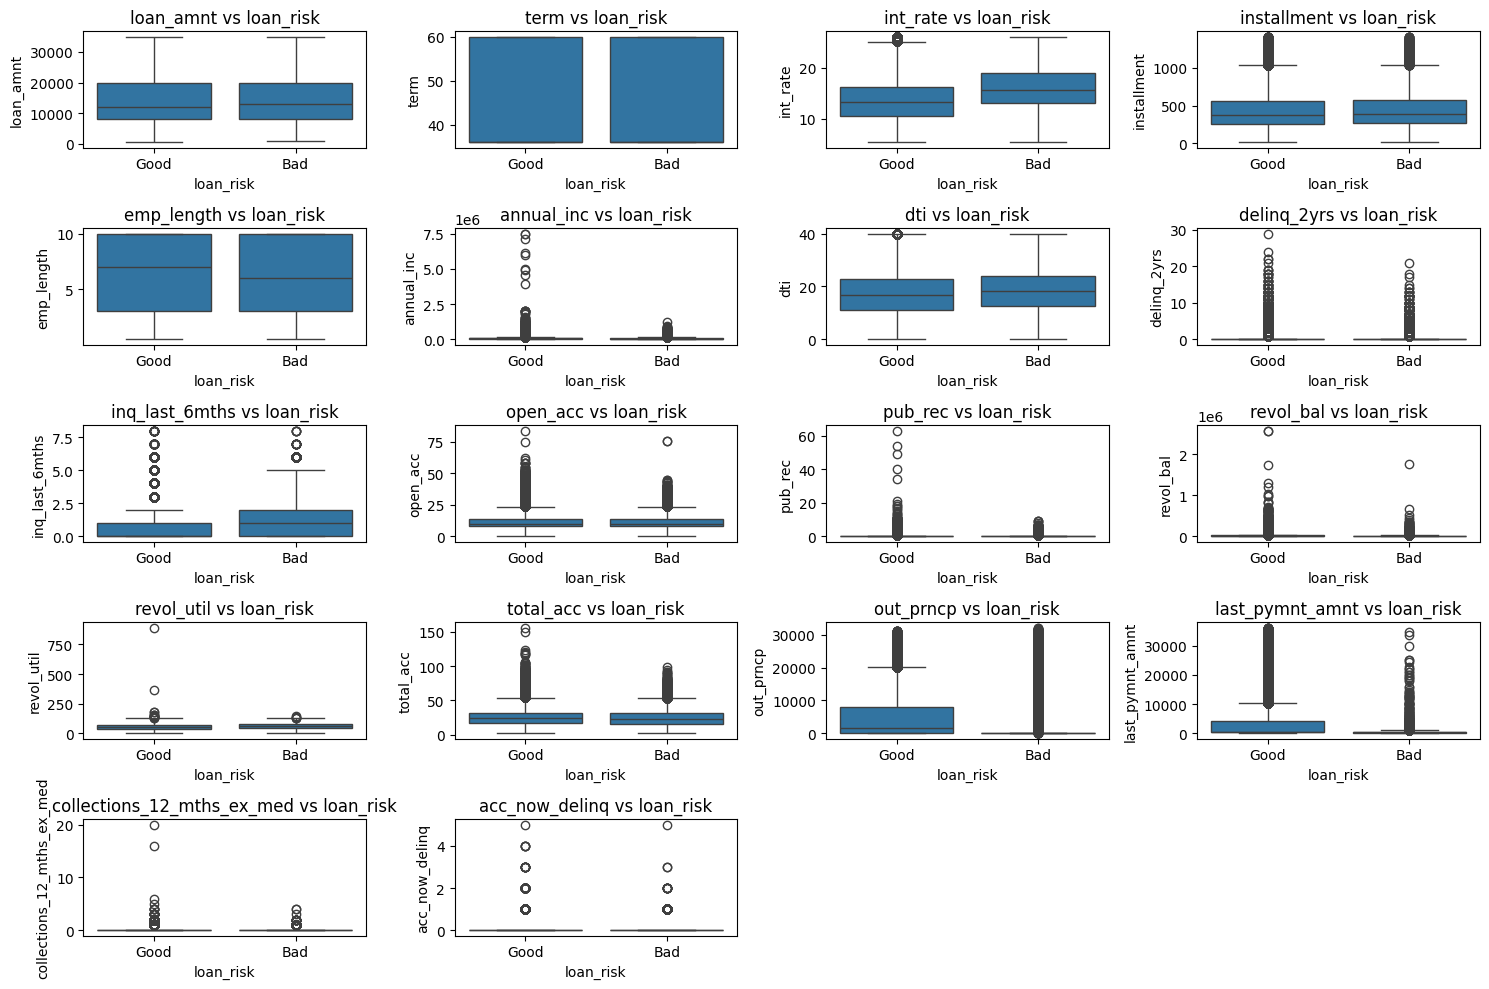

In [24]:
# Step 3: Bivariate Analysis
# Numerical vs loan_risk
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(5, 4, i)
    sns.boxplot(x='loan_risk', y=col, data=df)
    plt.title(f"{col} vs loan_risk")
    plt.tight_layout()
plt.show()


Crosstab grade vs loan_risk:
loan_risk       Bad      Good
grade                        
A          0.039415  0.960585
B          0.079978  0.920022
C          0.117075  0.882925
D          0.156633  0.843367
E          0.198206  0.801794
F          0.244492  0.755508
G          0.278133  0.721867


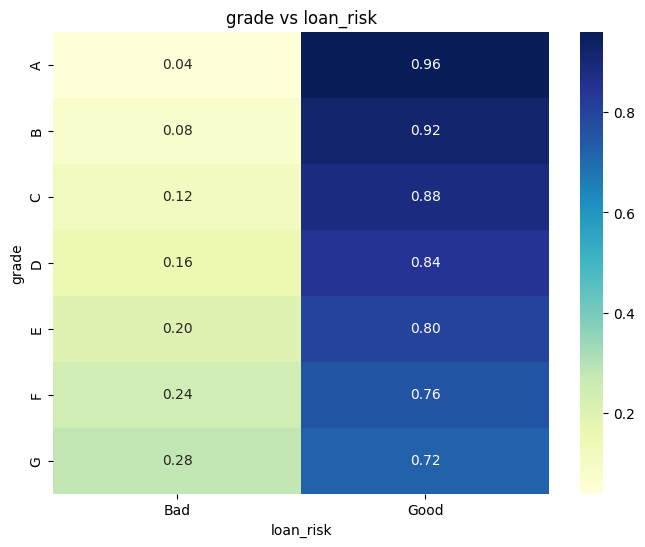


Crosstab home_ownership vs loan_risk:
loan_risk            Bad      Good
home_ownership                    
MORTGAGE        0.097601  0.902399
OTHER           0.178947  0.821053
OWN             0.110653  0.889347
RENT            0.127653  0.872347


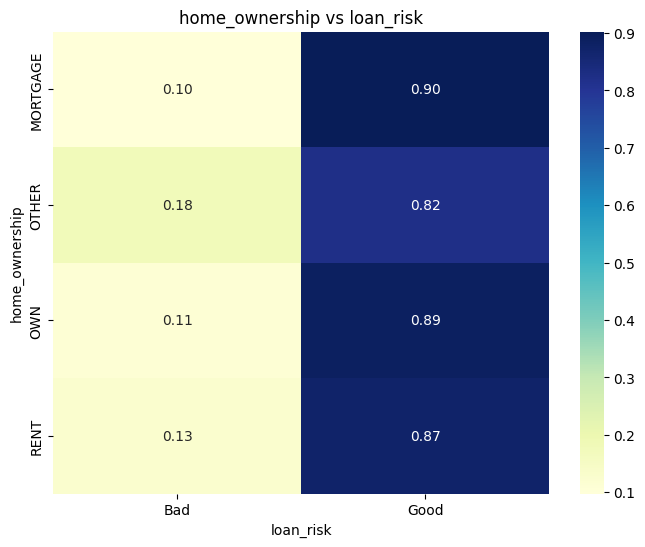


Crosstab verification_status vs loan_risk:
loan_risk                 Bad      Good
verification_status                    
Not Verified         0.093535  0.906465
Source Verified      0.106932  0.893068
Verified             0.129745  0.870255


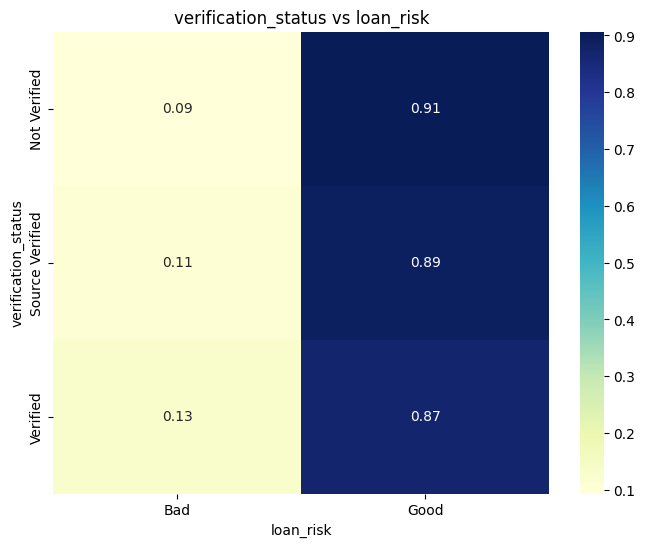


Crosstab pymnt_plan vs loan_risk:
loan_risk        Bad      Good
pymnt_plan                    
n           0.110932  0.889068
y           0.555556  0.444444


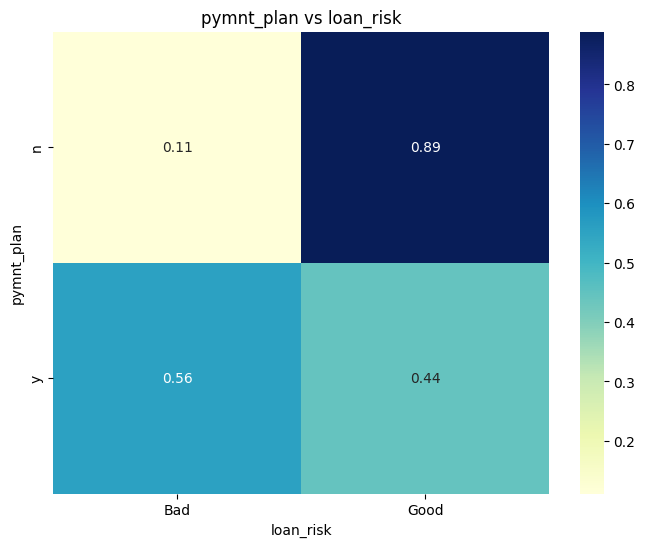


Crosstab purpose vs loan_risk:
loan_risk                Bad      Good
purpose                               
car                 0.089068  0.910932
credit_card         0.087953  0.912047
debt_consolidation  0.115506  0.884494
educational         0.172308  0.827692
home_improvement    0.098811  0.901189
house               0.139775  0.860225
major_purchase      0.096754  0.903246
medical             0.132482  0.867518
moving              0.152646  0.847354
other               0.138313  0.861687
renewable_energy    0.152299  0.847701
small_business      0.215120  0.784880
vacation            0.121151  0.878849
wedding             0.118933  0.881067


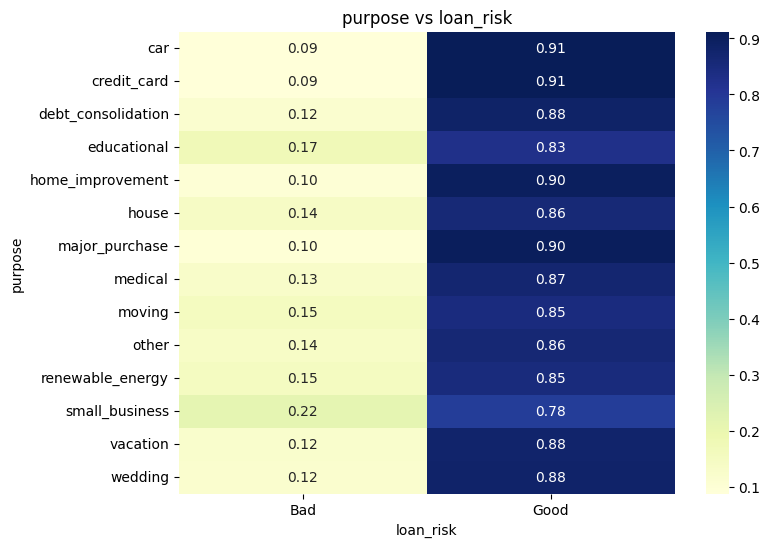


Crosstab addr_state vs loan_risk:
loan_risk        Bad      Good
addr_state                    
AK          0.089085  0.910915
AL          0.126439  0.873561
AR          0.111431  0.888569
AZ          0.112747  0.887253
CA          0.115007  0.884993
CO          0.093136  0.906864
CT          0.094931  0.905069
DC          0.067090  0.932910
DE          0.111200  0.888800
FL          0.126477  0.873523
GA          0.104768  0.895232
HI          0.127823  0.872177
IA          0.142857  0.857143
ID          0.111111  0.888889
IL          0.094720  0.905280
IN          0.108365  0.891635
KS          0.090778  0.909222
KY          0.108261  0.891739
LA          0.119143  0.880857
MA          0.107214  0.892786
MD          0.116012  0.883988
ME          0.000000  1.000000
MI          0.113028  0.886972
MN          0.108471  0.891529
MO          0.115763  0.884237
MS          0.091058  0.908942
MT          0.093141  0.906859
NC          0.117475  0.882525
NE          0.625000  0.375000
NH  

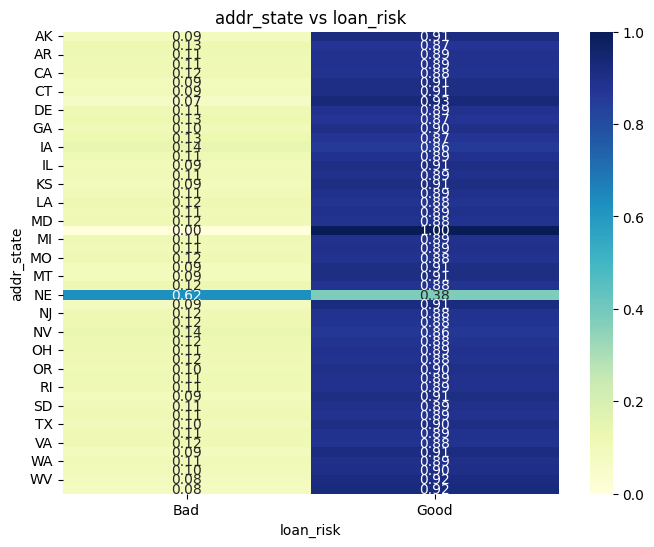


Crosstab initial_list_status vs loan_risk:
loan_risk                 Bad      Good
initial_list_status                    
f                    0.121100  0.878900
w                    0.092259  0.907741


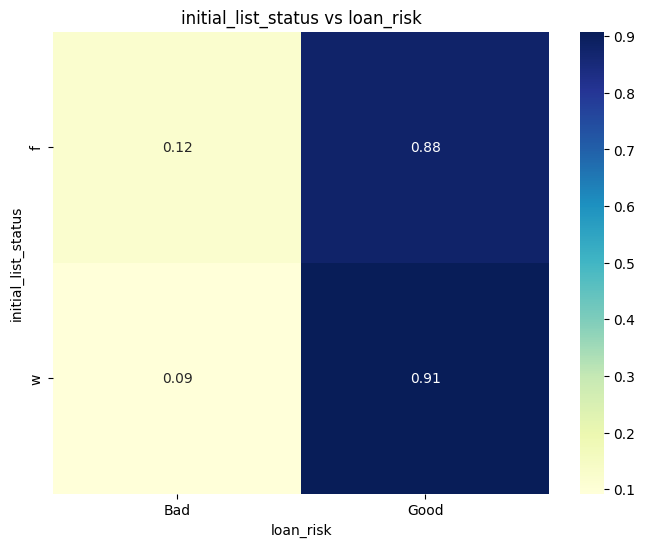

In [25]:
# Categorical vs loan_risk
for col in categorical_cols:
    if col != 'loan_risk':
        crosstab = pd.crosstab(df[col], df['loan_risk'], normalize='index')
        print(f"\nCrosstab {col} vs loan_risk:")
        print(crosstab)
        plt.figure(figsize=(8, 6))
        sns.heatmap(crosstab, annot=True, cmap="YlGnBu", fmt='.2f')
        plt.title(f"{col} vs loan_risk")
        plt.show()

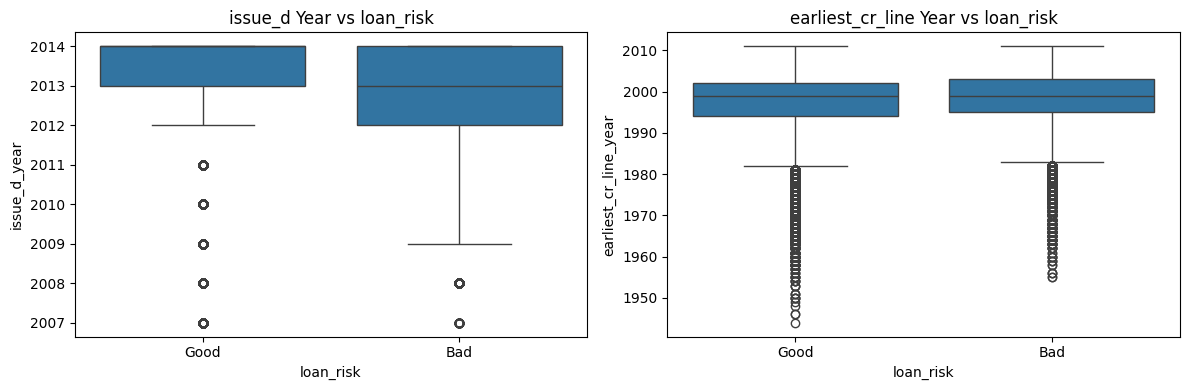

In [26]:
# Datetime vs loan_risk
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.boxplot(x='loan_risk', y='issue_d_year', data=df)
plt.title("issue_d Year vs loan_risk")
plt.subplot(1, 2, 2)
sns.boxplot(x='loan_risk', y='earliest_cr_line_year', data=df)
plt.title("earliest_cr_line Year vs loan_risk")
plt.tight_layout()
plt.show()

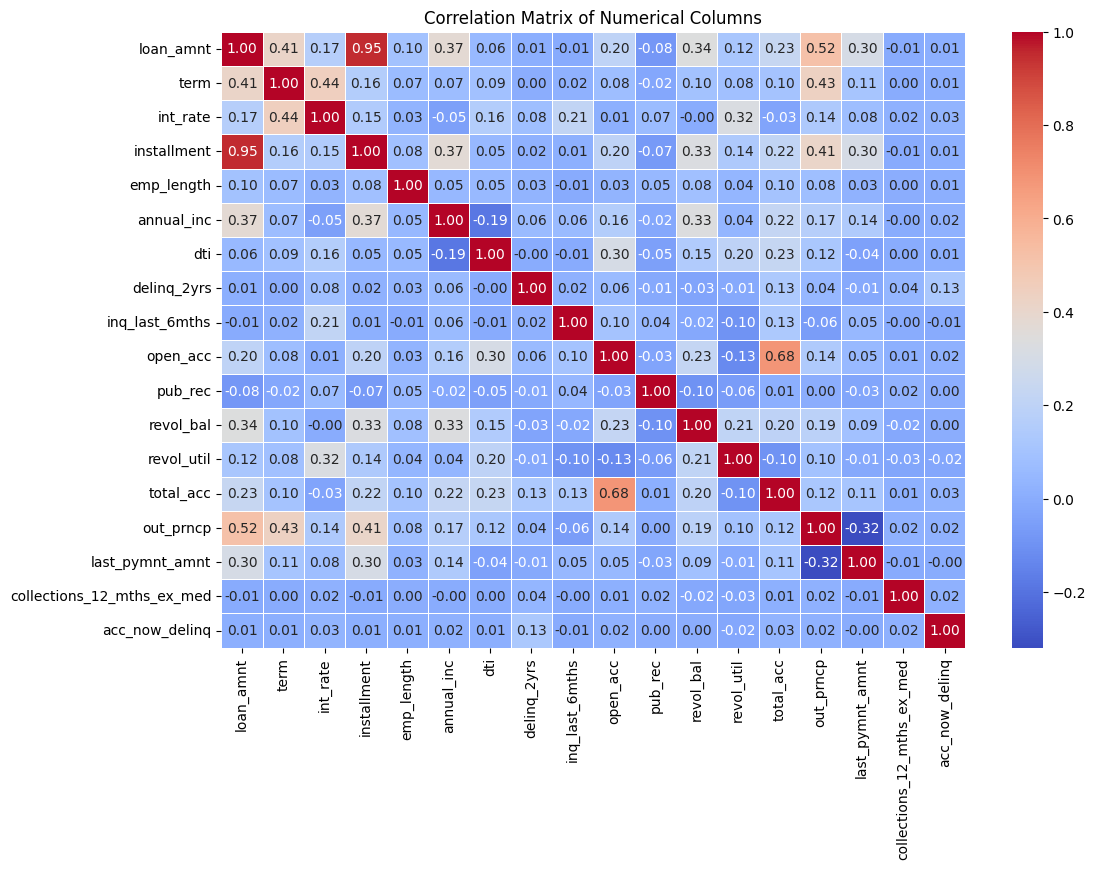

In [27]:
# Step 4: Multivariate Analysis
# Correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix of Numerical Columns")
plt.show()

In [28]:
# 1. Pilih fitur datetime yang ingin diperiksa (hanya issue_d_year dan earliest_cr_line_year)
datetime_features = ['issue_d_year', 'earliest_cr_line_year']

# 2. Hitung matriks korelasi absolut
correlation_matrix = df[datetime_features].corr().abs()

# 3. Ubah matriks korelasi menjadi format unstacked untuk menemukan pasangan korelasi
correlation_matrix_unstacked = correlation_matrix.unstack().sort_values(ascending=False).reset_index()
correlation_matrix_unstacked.columns = ['Feature 1', 'Feature 2', 'Correlation']

# 4. Filter untuk menghapus korelasi diri sendiri (Feature 1 = Feature 2)
correlation_matrix_unstacked = correlation_matrix_unstacked[correlation_matrix_unstacked['Feature 1'] != correlation_matrix_unstacked['Feature 2']]

# 5. Filter untuk korelasi > 0.7 (multikolinearitas tinggi)
correlation_matrix_high = correlation_matrix_unstacked[correlation_matrix_unstacked['Correlation'] > 0.7]

# 6. Tampilkan hasil
print("High correlations (> 0.7) between issue_d_year and earliest_cr_line_year:")
print(correlation_matrix_high)

High correlations (> 0.7) between issue_d_year and earliest_cr_line_year:
Empty DataFrame
Columns: [Feature 1, Feature 2, Correlation]
Index: []


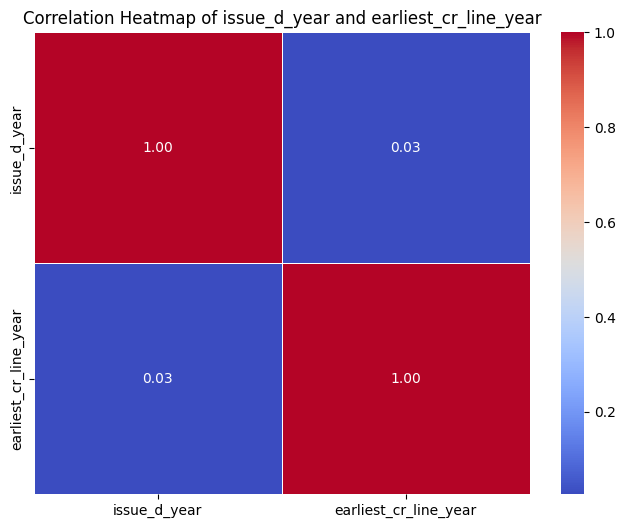

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(df[datetime_features].corr(), annot=True, cmap="coolwarm", fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap of issue_d_year and earliest_cr_line_year")
plt.show()

### Data Preparation

In [30]:
# Find column with corelation > 0.7
correlation_matrix = df[numerical_cols].corr().abs()
correlation_matrix = correlation_matrix.unstack().sort_values(ascending=False).reset_index()
correlation_matrix.columns = ['Feature 1', 'Feature 2', 'Correlation']
correlation_matrix = correlation_matrix[correlation_matrix['Feature 1'] != correlation_matrix['Feature 2']]
correlation_matrix = correlation_matrix[correlation_matrix['Correlation'] > 0.7]
correlation_matrix


,Feature 1,Feature 2,Correlation
18,installment,loan_amnt,0.949547
19,loan_amnt,installment,0.949547


In [31]:
# Drop installment (assuming it's the one to drop)
df = df.drop(columns=['installment'], axis=1)
print("Columns after dropping:", df.columns)

Columns after dropping: Index(['loan_amnt', 'term', 'int_rate', 'grade', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'issue_d',
       'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_bal', 'revol_util', 'total_acc', 'initial_list_status',
       'out_prncp', 'last_pymnt_amnt', 'collections_12_mths_ex_med',
       'acc_now_delinq', 'loan_risk', 'issue_d_year', 'earliest_cr_line_year'],
      dtype='object')


In [32]:
# Drop column issue_d and earliest_cr_line
df = df.drop(columns=['issue_d', 'earliest_cr_line'], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 463536 entries, 0 to 466284
Data columns (total 27 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   loan_amnt                   463536 non-null  int64  
 1   term                        463536 non-null  int64  
 2   int_rate                    463536 non-null  float64
 3   grade                       463536 non-null  object 
 4   emp_length                  463536 non-null  float64
 5   home_ownership              463536 non-null  object 
 6   annual_inc                  463536 non-null  float64
 7   verification_status         463536 non-null  object 
 8   pymnt_plan                  463536 non-null  object 
 9   purpose                     463536 non-null  object 
 10  addr_state                  463536 non-null  object 
 11  dti                         463536 non-null  float64
 12  delinq_2yrs                 463536 non-null  float64
 13  inq_last_6mths     

In [33]:
# Handling Outliers
# Cap outliers in 'annual_inc', 'revol_bal', 'open_acc' and 'revol_util'

df['revol_util'] = df['revol_util'].apply(lambda x: min(x, 100))
def cap_outliers_iqr(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + 1.5 * iqr
    df[column] = df[column].apply(lambda x: min(x, upper_bound))
    return df

df = cap_outliers_iqr(df, 'annual_inc')
df = cap_outliers_iqr(df, 'revol_bal')
df.loc[df['open_acc'] == 0, 'open_acc'] = 1

In [34]:
# Encoding
from sklearn.preprocessing import LabelEncoder

# Encode target
label_encoder = LabelEncoder()
df['loan_risk_encoded'] = label_encoder.fit_transform(df['loan_risk'])

# One-hot encoding for categorical features
categorical_cols = ['grade', 'home_ownership', 'verification_status', 'pymnt_plan', 
                    'purpose', 'addr_state', 'initial_list_status']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [35]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df_encoded.drop(columns=['loan_risk', 'loan_risk_encoded'])
y = df_encoded['loan_risk_encoded']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [36]:
# Scaling
from sklearn.preprocessing import StandardScaler

# Pilih kolom numerik (termasuk dari encoding)
numerical_cols = X_train.select_dtypes(include=['int64', 'float64', 'int32', 'uint8']).columns.tolist()

# Terapkan scaling
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

In [37]:
# SMOTE
from imblearn.over_sampling import SMOTE

# Cek distribusi kelas sebelum SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

# Terapkan SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Cek distribusi kelas setelah SMOTE
print("After SMOTE:")
print(y_train_smote.value_counts())

Before SMOTE:
loan_risk_encoded
1    329688
0     41140
Name: count, dtype: int64
After SMOTE:
loan_risk_encoded
1    329688
0    329688
Name: count, dtype: int64


In [39]:
# Gabungkan kembali X_train_smote dan y_train_smote menjadi DataFrame
processed_data = pd.DataFrame(X_train_smote, columns=X_train.columns)
processed_data['target'] = y_train_smote

# Simpan ke file CSV
processed_data.to_csv('processed_credit_risk_data.csv', index=False)

c:\Users\ACER\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  "gtol": tol,


Logistic Regression:
              precision    recall  f1-score   support

           0       0.58      0.55      0.56     10285
           1       0.94      0.95      0.95     82423

    accuracy                           0.91     92708
   macro avg       0.76      0.75      0.76     92708
weighted avg       0.90      0.91      0.90     92708

Accuracy: 0.9059412348448893

Random Forest:
              precision    recall  f1-score   support

           0       0.71      0.68      0.69     10285
           1       0.96      0.96      0.96     82423

    accuracy                           0.93     92708
   macro avg       0.83      0.82      0.83     92708
weighted avg       0.93      0.93      0.93     92708

Accuracy: 0.9329291970487984


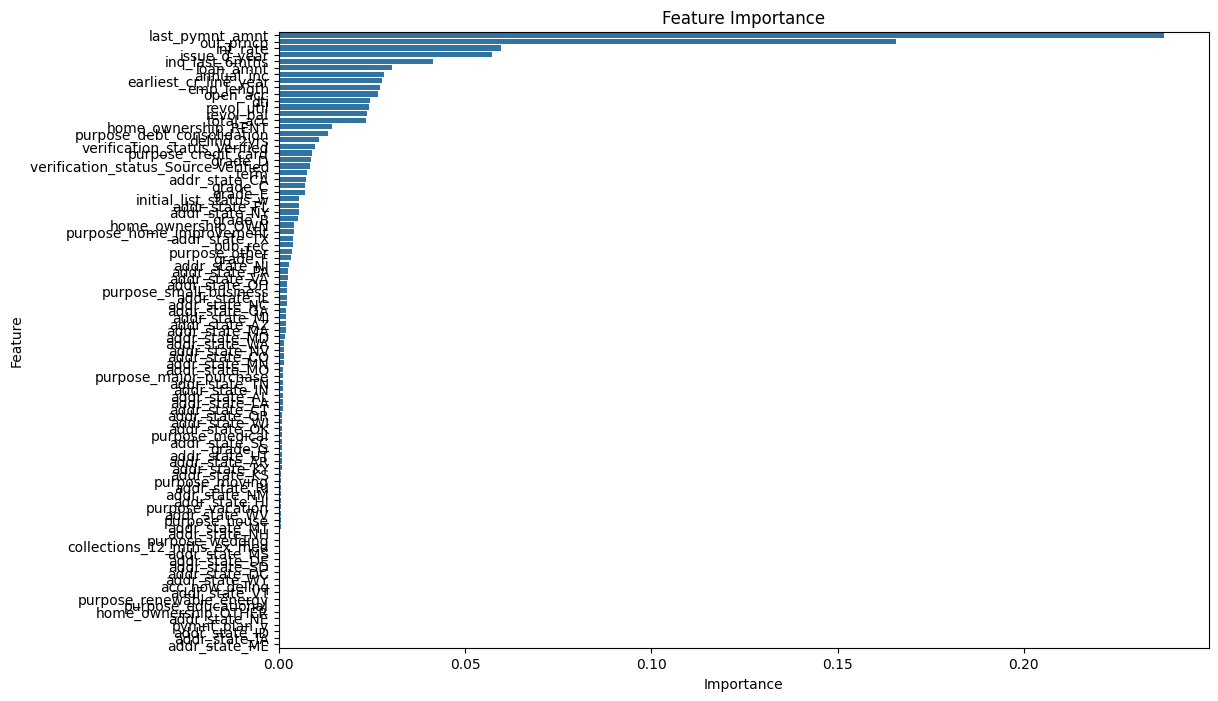

In [48]:
# Model Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Inisialisasi model
logreg = LogisticRegression(random_state=42)
rf = RandomForestClassifier(random_state=42)

# Fit model
logreg.fit(X_train_smote, y_train_smote)
rf.fit(X_train_smote, y_train_smote)

# Predict
y_pred_logreg = logreg.predict(X_test)
y_pred_rf = rf.predict(X_test)

# Evaluate
print("Logistic Regression:")
print(classification_report(y_test, y_pred_logreg))
print("Accuracy:", accuracy_score(y_test, y_pred_logreg))

print("\nRandom Forest:")
print(classification_report(y_test, y_pred_rf))
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

# Feature Importance
feature_importance = rf.feature_importances_
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df)
plt.title("Feature Importance")
plt.show()
